<a href="https://colab.research.google.com/github/Tanuja2725/Clusters/blob/main/MOBILE_PRICE_CLASSIFICATIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MOBILE PRICE CLASSIFICATIONS**









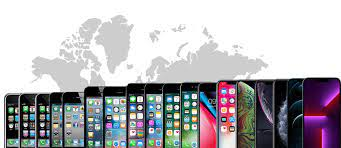

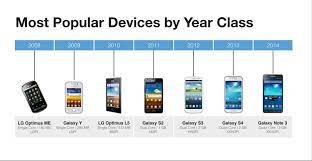

A Machine Learning Project to predict the Price Class of a Mobile based on its Specifications


   We studied the entire dataset we had for the topic on Kaggle 
found all the important information on the data we were going to work on



    1.   The Data Preprocessing
     * Description of Data
     * Info about the data
     * The Correlation between the attributes
     * The attributes that are most correlated with the Price Range ( Our target )
     * Outlier Analysis of Non-categorical Data
     
   
   Next we tried Machine Learning Algorithms for each we made a confusion matrix and the most contributing features were found

    > Logistic Regression
    > Decision Tree(gini)
    > Decision Tree(entropy)



**IMPORTING LIBRARIES**

In [ ]:
# 1.0 call libraries for dataframe
import numpy as np
import pandas as pd
import os

#1.1 import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import seaborn as sn

#1.2 import required libraries clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

#1.3 import required libraries for classification 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split




In [ ]:
# 1.4 Display output of multiple commands from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#**READIND THE DATASET**


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

19

Hello Google Drive!

In [ ]:
# 2.0 Set datafile path
path = "/gdrive/MyDrive/colab_data_ files/excercise  cluster/mobil_price"
os.chdir(path)

In [ ]:
# read the data from csv file

Mpdata = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

#**DATA ANALYSIS**

In [ ]:
#  Look at data

Mpdata.shape                        
print()
Mpdata.head()

(2000, 21)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#Inspecting the Test Dataset

test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


Dataset as 21 features and 2000 entries. The meanings of the features are given below.

1. battery_power: Total energy a battery can store in one time measured in mAh

2. blue: Has bluetooth or not

3. clock_speed: speed at which microprocessor executes instructions

4. dual_sim: Has dual sim support or not

5. fc: Front Camera mega pixels

6. four_g: Has 4G or not

7. int_memory: Internal Memory in Gigabytes

8. m_dep: Mobile Depth in cm

9. mobile_wt: Weight of mobile phone

10. n_cores: Number of cores of processor

11. pc: Primary Camera mega pixels

12. px_height: Pixel Resolution Height

13. px_width: Pixel Resolution Width

14. ram: Random Access Memory in Mega Bytes

15. sc_h: Screen Height of mobile in cm

16. sc_w: Screen Width of mobile in cm

17. talk_time: longest time that a single battery charge will last when you are

18. three_g: Has 3G or not

19. touch_screen: Has touch screen or not

20. wifi: Has wifi or not

21. price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

22. In the following table, first 10 entries are shown.



In [ ]:
#Display information about our dataset

Mpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#Display the data types

Mpdata.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
#display the value counts

Mpdata.dtypes.value_counts()

int64      19
float64     2
dtype: int64

In [ ]:
# 2.4  Check if there are Missing/duplicate values? None
Mpdata.isnull().sum()            # None
print("\n----------")
Mpdata.isnull().sum().sum()      # None
print("\n------------")
Mpdata.duplicated().sum()        # None

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


----------


0


------------


0

In [ ]:
#Nan values in row wise

Mpdata.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# Price range --absolute vs normalized

Mpdata['price_range'].value_counts()
print("\n--normalized--\n")
Mpdata['price_range'].value_counts(normalize=True)

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


--normalized--



1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

In [ ]:
#memory usagr of dataset

Mpdata.memory_usage().sum()

336128

Text(0.5, 1.0, 'Correlation ')

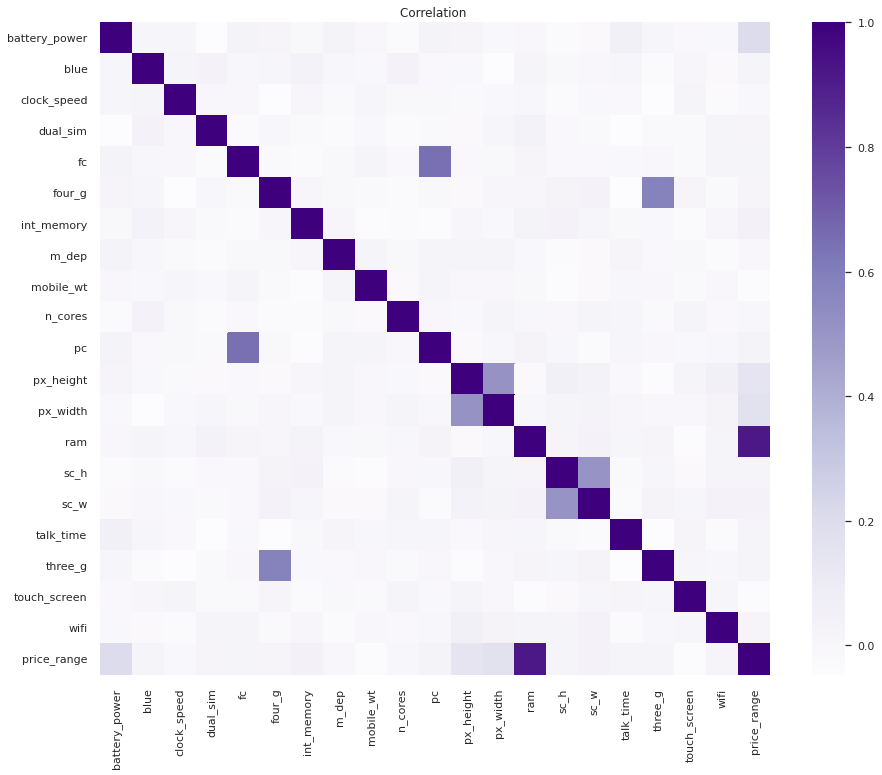

In [ ]:
#correlation of data

corr=Mpdata.corr()
fig = plt.figure(figsize=(15,12));
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


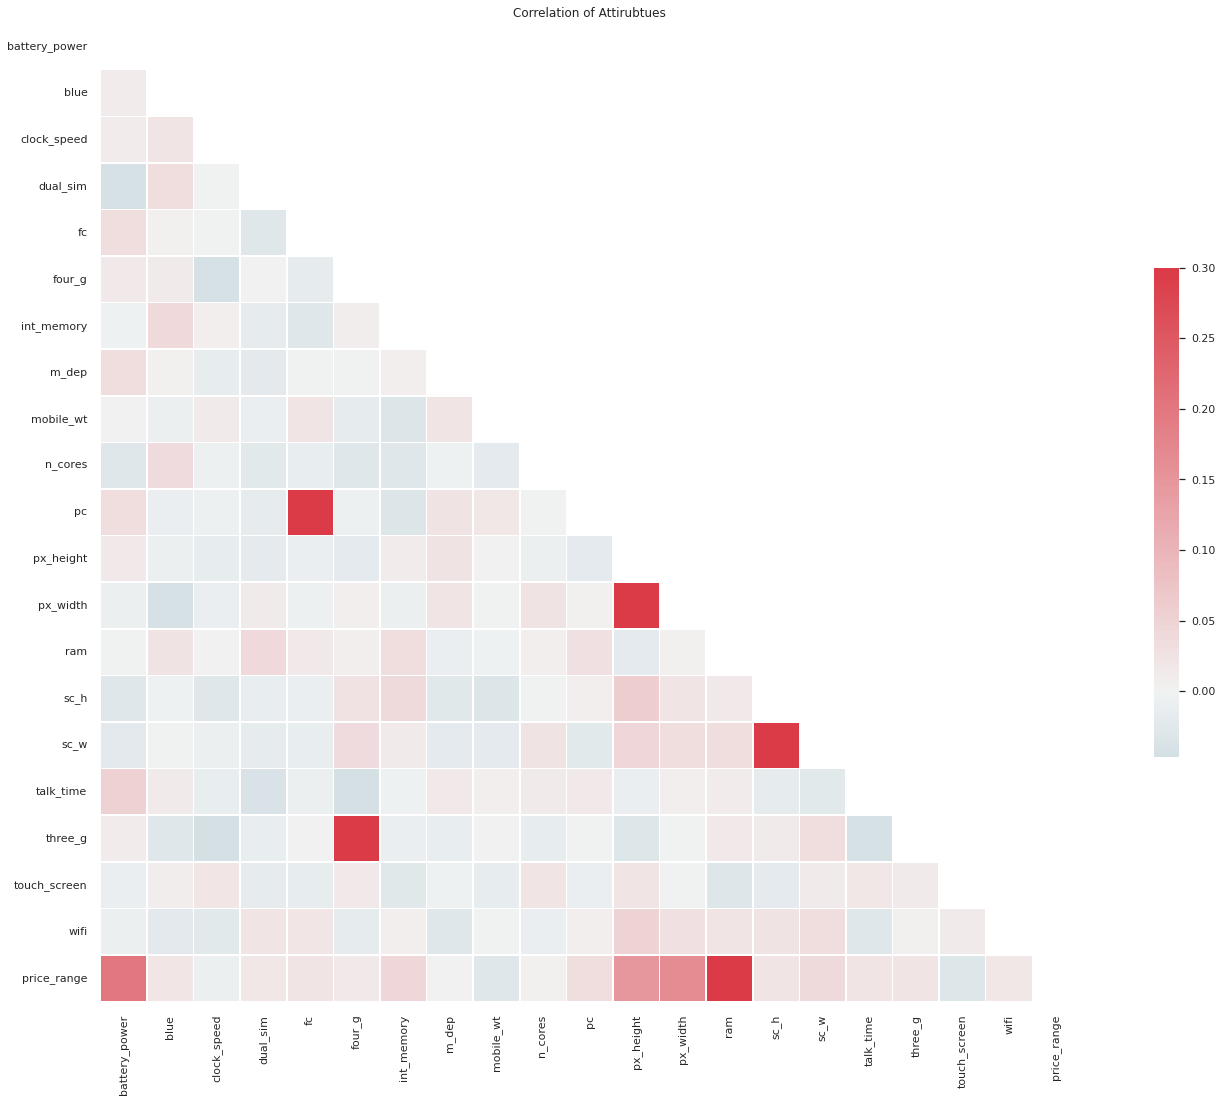

In [ ]:
# correlation of data

sns.set(style="white");

# Compute the correlation matrix
corr = Mpdata.corr();

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool);
mask[np.triu_indices_from(mask)] = True;

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(27,18));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True);

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.title("Correlation of Attirubtues");

Here, we can see that the following have high correlation with each other

1. pc and fc
2. three_g and four_g
3. px_width and px_height

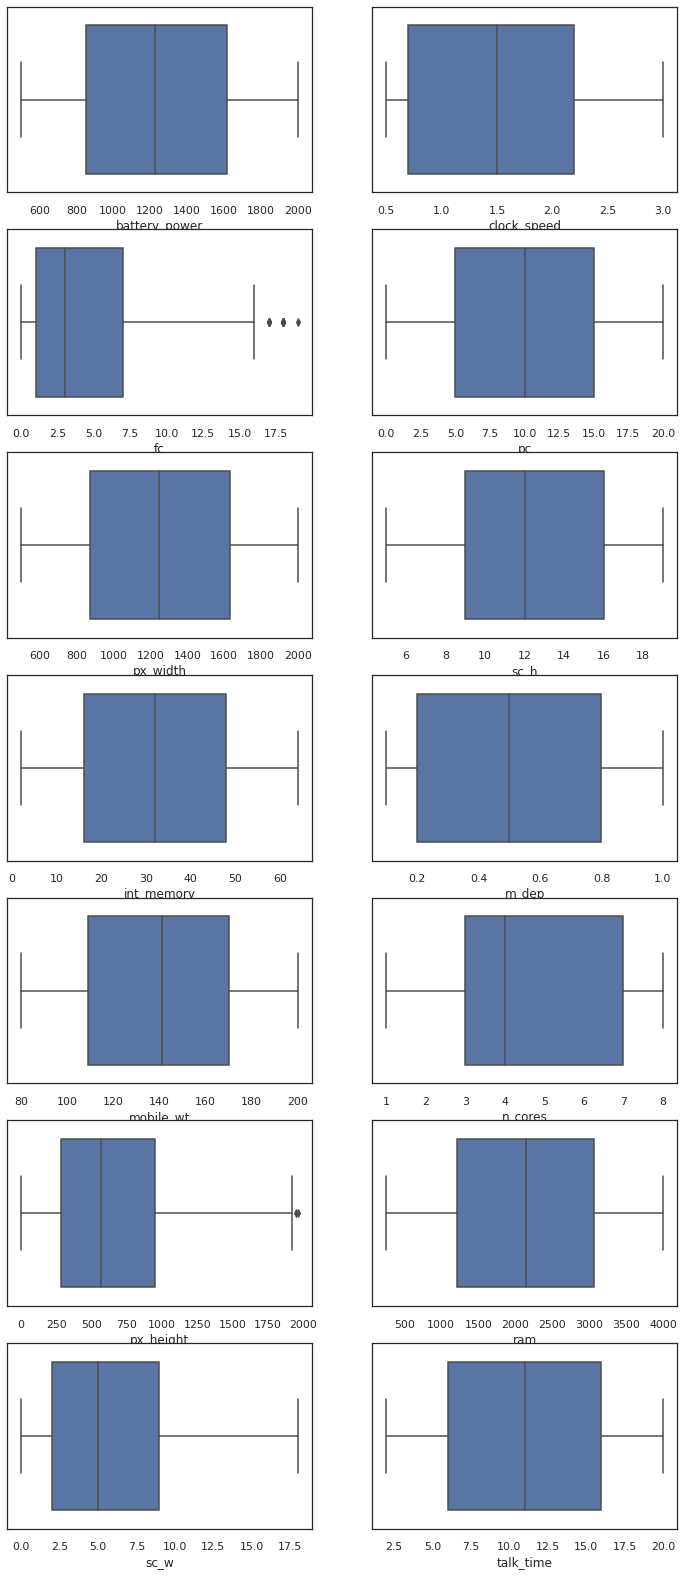

In [ ]:
#Outlier Analysis of Non-Categorical Data

fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,28)) ;

sns.boxplot(x=Mpdata['battery_power'],ax=ax[0,0]);

sns.boxplot(x=Mpdata['clock_speed'],ax=ax[0,1]);

sns.boxplot(x=Mpdata['fc'],ax=ax[1,0]);

sns.boxplot(x=Mpdata['pc'],ax=ax[1,1]);

sns.boxplot(x=Mpdata['px_width'],ax=ax[2,0]);

sns.boxplot(x=Mpdata['sc_h'],ax=ax[2,1]);

sns.boxplot(x=Mpdata['int_memory'],ax=ax[3,0]);

sns.boxplot(x=Mpdata['m_dep'],ax=ax[3,1]);

sns.boxplot(x=Mpdata['mobile_wt'],ax=ax[4,0]);

sns.boxplot(x=Mpdata['n_cores'],ax=ax[4,1]);

sns.boxplot(x=Mpdata['px_height'],ax=ax[5,0]);

sns.boxplot(x=Mpdata['ram'],ax=ax[5,1]);

sns.boxplot(x=Mpdata['sc_w'],ax=ax[6,0]);

sns.boxplot(x=Mpdata['talk_time'],ax=ax[6,1]);

**There are a few outliers in fc and px_height only.**

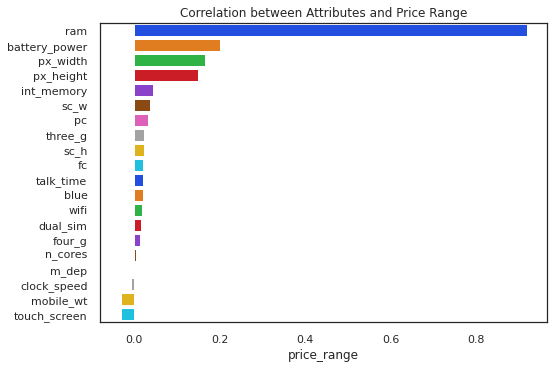

In [ ]:
#we are not considering the correlations between X features among themselves

corr = Mpdata.corr();
corr = corr.price_range;
cr = corr.sort_values(ascending = False)[1:];
sns.barplot(x=cr, y=cr.index,palette = "bright");
plt.title("Correlation between Attributes and Price Range");

##**DATA VISUALIZATION**

------------>Analysis of Attributes<------------



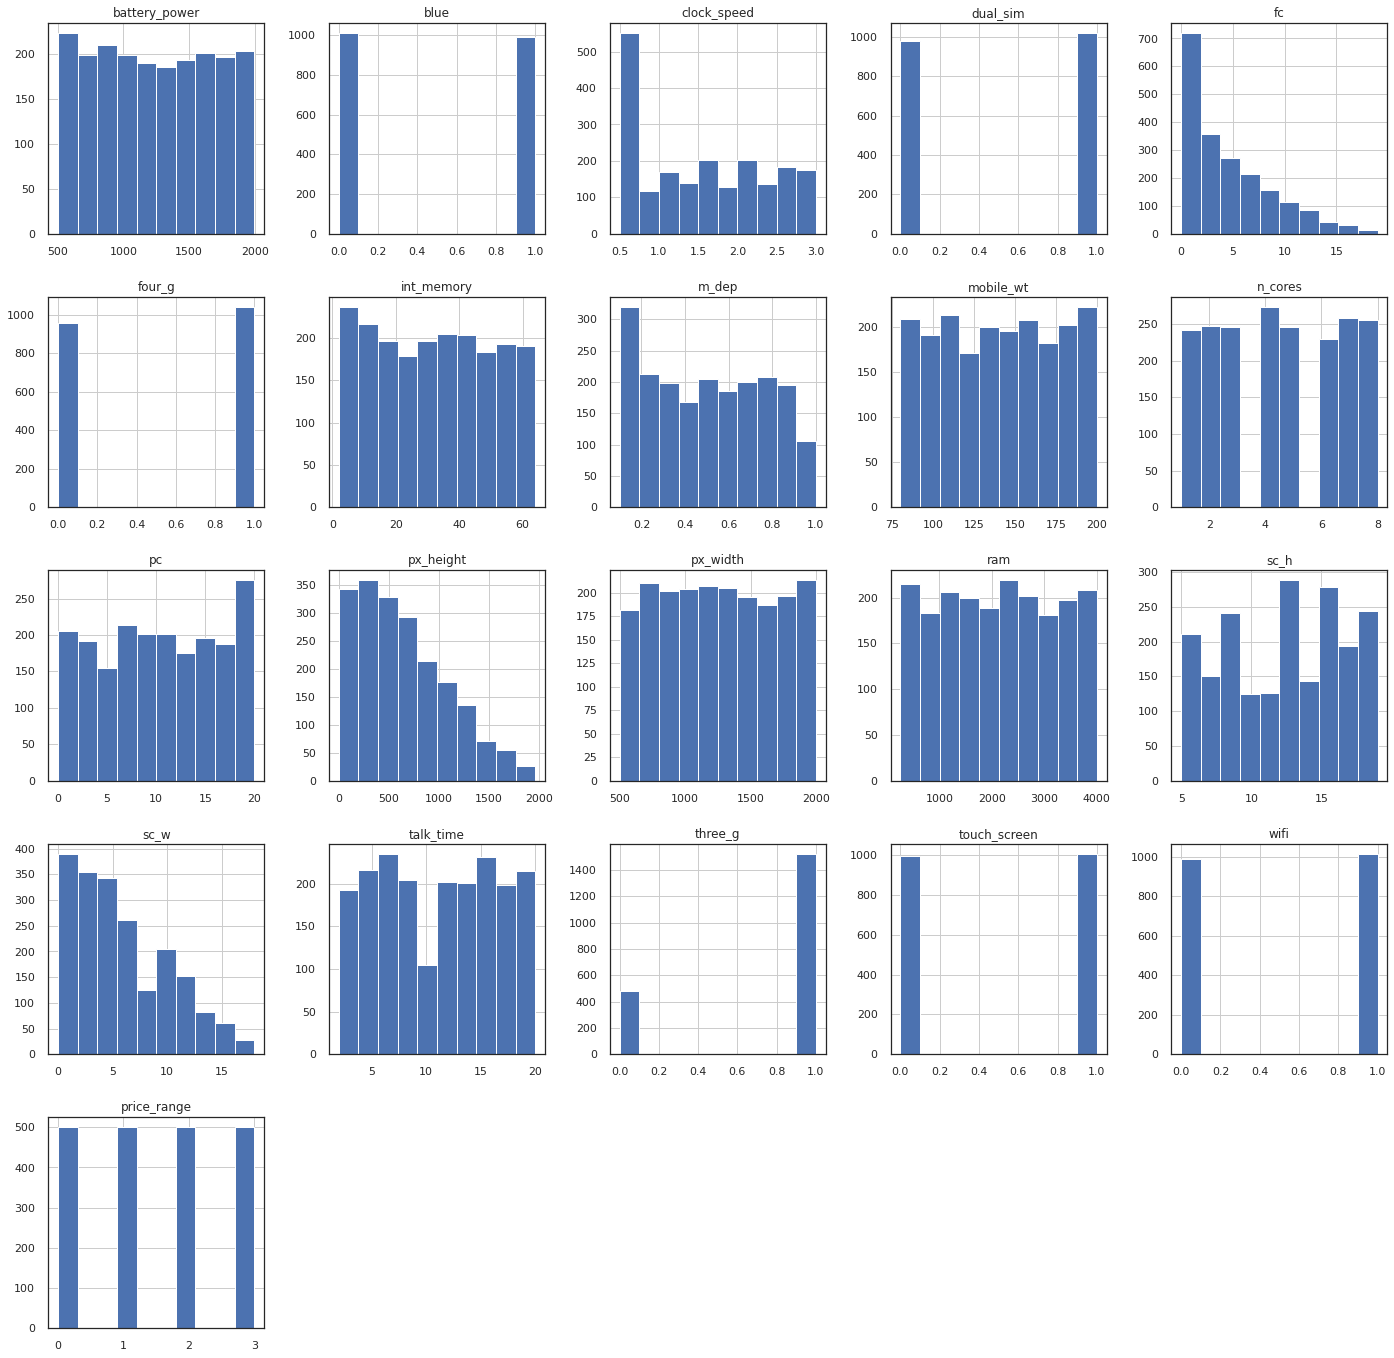

In [ ]:
#data visualization drawing histogram

print("------------>Analysis of Attributes<------------")
print()
Mpdata.hist(sharex=False, sharey=False, figsize=(24,24) );
plt.show();




###**PRICE RANGE AND RAM**

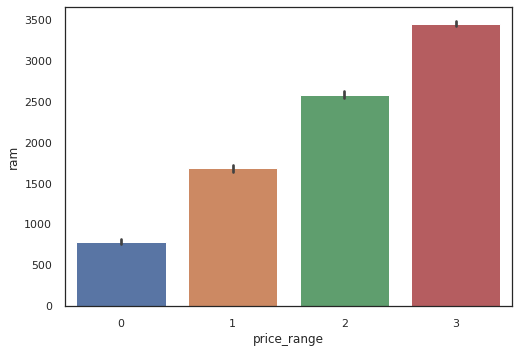

In [ ]:
# analysing RAM with price_range

df= Mpdata[['price_range']].groupby(Mpdata['ram']).sum()
df.reset_index(inplace=True)
sns.barplot(data= df, x=Mpdata['price_range'], y=Mpdata['ram'])

        here the less RAM having less price

###**PRICE RANGE AND BATTERY POWER**

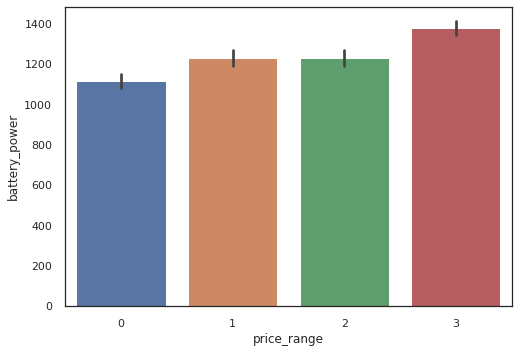

In [ ]:
#battery_power vs price_range

PB= Mpdata[['price_range']].groupby(Mpdata['battery_power']).sum()
PB.reset_index(inplace = True)
sns.barplot(data = PB, x = Mpdata['price_range'],y = Mpdata['battery_power']);


      here Battery capacity increase with price  

###**PRICE RANGE AND TOUCH SCREEN**

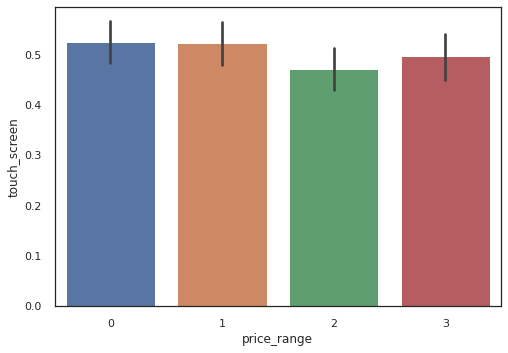

In [ ]:
# Touch_screen feature with price_range

TP= Mpdata[['price_range']].groupby(Mpdata['touch_screen']).sum()
Mpdata.reset_index(inplace = True)
sns.barplot(data = TP, x = Mpdata["price_range"],y = Mpdata["touch_screen"]);

      here Touch_screen size smaller at price range 2 and bigger at price range 1

###**N_CORES AND BATTERY POWER**

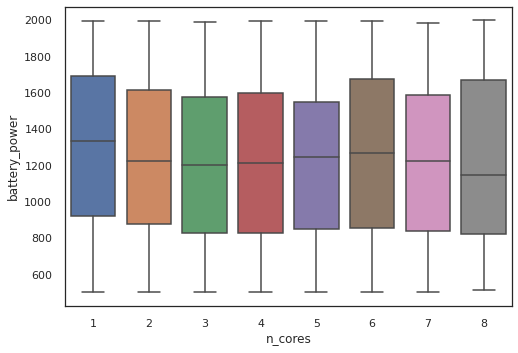

In [ ]:
#comparing battery power with n_cores

sn.boxplot(data=Mpdata, x=Mpdata['n_cores'], y=Mpdata['battery_power']);

       here Battery power maximum with 8 n_cores

###**BATTERY POWER AND CLOCK SPEED**

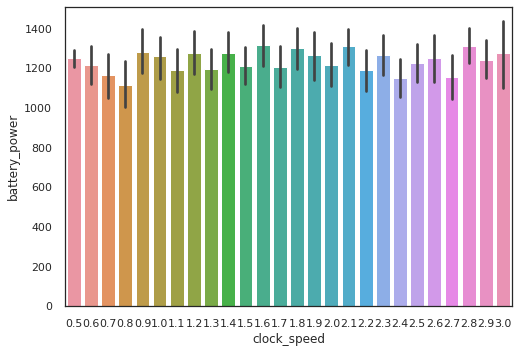

In [ ]:
# Bar chat for Battery_power and clock_speed

BCP= Mpdata[['clock_speed']].groupby(Mpdata['battery_power']).sum()
BCP.reset_index(inplace = True)
sns.barplot(data = BCP,x = Mpdata['clock_speed'],y = Mpdata['battery_power']);

###**PRICE RANGE AND DIFFERENT FEATURES OF MOBILE**

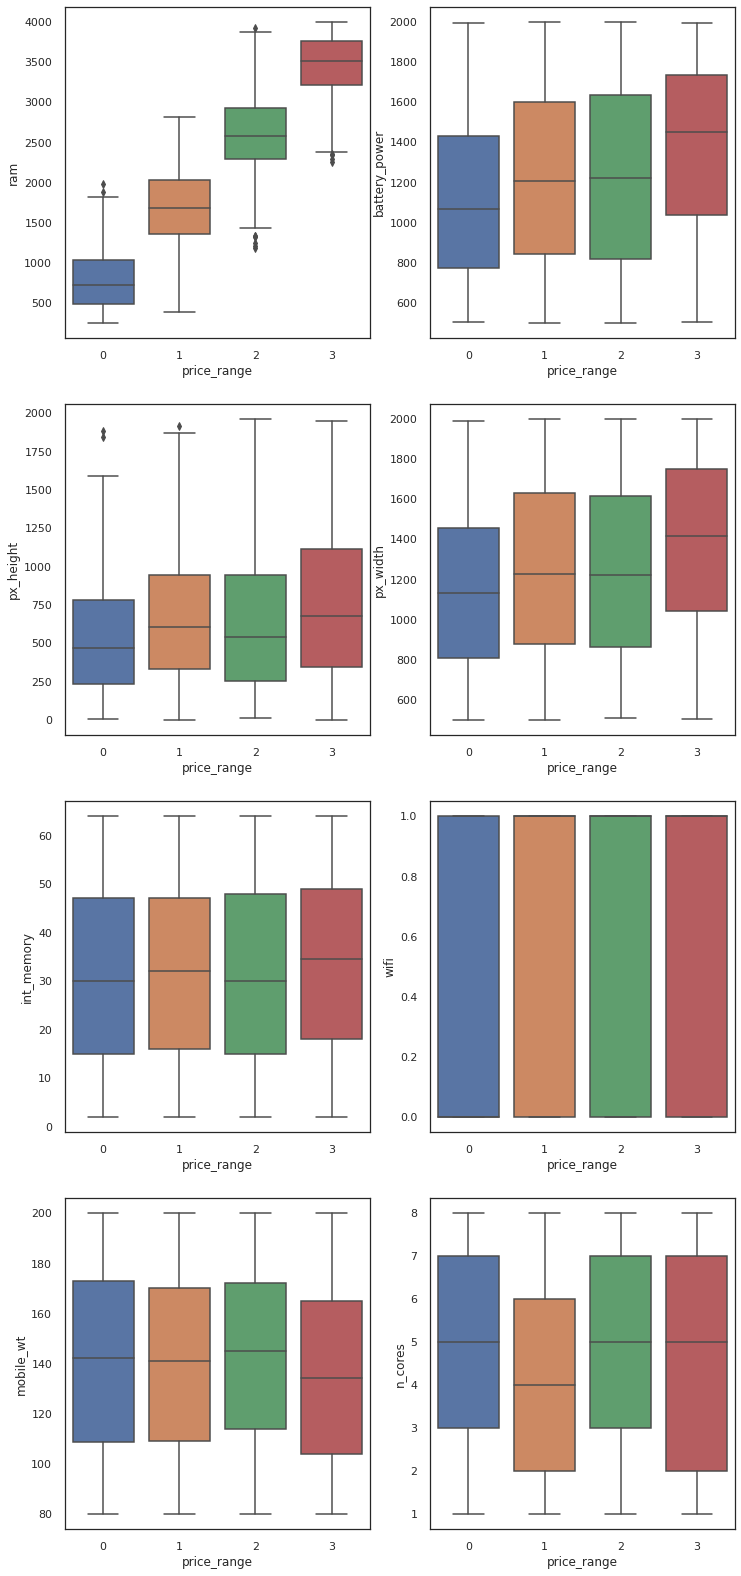

In [ ]:
#Box plots for price range comparing with features

fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(12,28))
sns.boxplot(x='price_range',y='ram',data=Mpdata,ax=ax[0,0]);
sns.boxplot(x='price_range',y='battery_power',data=Mpdata,ax=ax[0,1]);
sns.boxplot(x='price_range',y='px_height',data=Mpdata,ax=ax[1,0]);
sns.boxplot(x='price_range',y='px_width',data=Mpdata,ax=ax[1,1]);
sns.boxplot(x='price_range',y='int_memory',data=Mpdata,ax=ax[2,0]);
sns.boxplot(x='price_range',y='wifi',data=Mpdata,ax=ax[2,1]);
sns.boxplot(x='price_range',y='mobile_wt',data=Mpdata,ax=ax[3,0]);
sns.boxplot(x='price_range',y='n_cores',data=Mpdata,ax=ax[3,1]);

###**BATTERY POWER- RAM AND PRICE RANGE scatter**

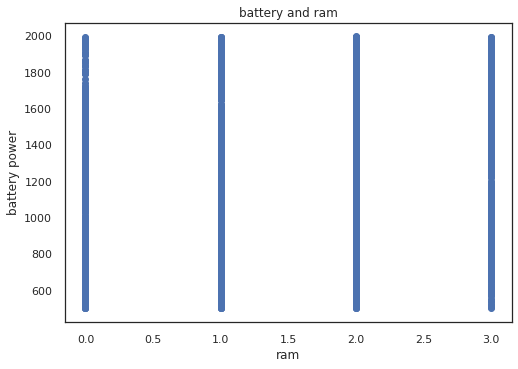

In [ ]:
#scatter plot for battery power RAM and Price range

plt.scatter(x=Mpdata['price_range'], y=Mpdata['battery_power'],cmap='Spectral'); # c = color, cmap = color map
plt.xlabel('ram');
plt.ylabel('battery power');
plt.title('battery and ram');


      scatter plot shows battery power and ram values

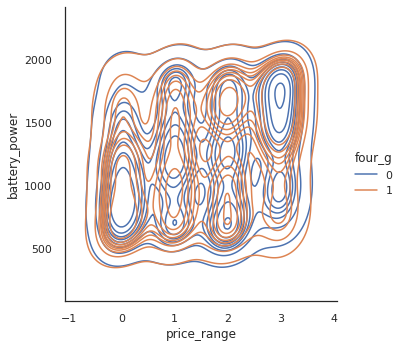

In [ ]:
# 2.6 kde plot with 3 features

sns.displot(kind='kde',data=Mpdata, x='price_range', y='battery_power',hue='four_g');

##**CLUSTERING**

In [ ]:
#creating clustering

X = Mpdata.drop('price_range',axis=1)
Y = Mpdata['price_range']

In [ ]:
#shape of x cluster
X.shape

(2000, 21)

In [ ]:
Y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

###**scaling the data using STANDARD SCALAR**

In [ ]:
# instantiate scalar

std = StandardScaler()

#fit the data

std.fit(X)

#transfotm the data

Mpdata_scaled = std.transform(X)

StandardScaler()

In [ ]:
#shape of train data

Mpdata_scaled.shape

(2000, 21)

In [ ]:
Mpdata_scaled

array([[-1.731185  , -0.90259726, -0.9900495 , ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-1.72945295, -0.49513857,  1.0100505 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.7277209 , -1.5376865 ,  1.0100505 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.7277209 ,  1.53077336, -0.9900495 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 1.72945295,  0.62252745, -0.9900495 , ...,  0.55964063,
         0.99401789,  0.98609664],
       [ 1.731185  , -1.65833069,  1.0100505 , ...,  0.55964063,
         0.99401789,  0.98609664]])

###**Instantiate KMeans Class**

In [ ]:
#   Instantiate KMeans class
#   with default values of parameters:
#   We fix number of clusters as: 5

kmeans = KMeans(n_clusters = 5,max_iter=300)


In [ ]:
# Fit KMeans in scaled data

kmeans.fit(Mpdata_scaled)

KMeans(n_clusters=5)

In [ ]:
#check number of iterations

kmeans.n_iter_

28

In [ ]:
#check number of features during fit

kmeans.n_features_in_

21

###**Coordinates of cluster centers**

In [ ]:
# Get cluster centers (centroids) now:

kmeans.cluster_centers_

array([[ 0.21487299,  0.04945073, -0.06595266, -0.01486077,  0.14136307,
        -0.50147672,  0.30327207, -0.04605707, -0.09313715, -0.0094798 ,
        -0.08920887, -0.39927425, -0.49912238, -0.31951529,  0.00579151,
        -0.7003385 , -0.64791103,  0.09724218,  0.55964063, -0.01865856,
        -0.17435464],
       [-0.10230778, -0.00674954, -0.02370905, -0.2083878 , -0.13700226,
        -0.4745    ,  0.29997408,  0.06757951,  0.09524574,  0.04852368,
         0.05858281, -0.41016119,  1.15504041,  0.97983384, -0.00189818,
         0.30601781,  0.19474362, -0.13776856,  0.51350155,  0.07827107,
         0.17702859],
       [-0.15885243,  0.07803645, -0.01809079,  0.06328315, -0.0414794 ,
         1.46380114,  0.23811912, -0.15570047, -0.01288842,  0.1151156 ,
        -0.04334946,  1.10627053,  0.02510694, -0.01241361,  0.1174875 ,
        -0.23081342, -0.29413415,  0.05455083,  0.48713637,  0.06141684,
         0.03094685],
       [-0.0081119 , -0.03637851,  0.06240487,  0.05408867

In [ ]:
# Which observation falls in which cluster?

kmeans.labels_

array([3, 1, 1, ..., 0, 4, 4], dtype=int32)

###**SSE value**

In [ ]:
#SSE or Intra-cluster variance

kmeans.inertia_

35306.31386836774

finding the silhoutte score

In [ ]:
# Initialize an empty list :

sse = []
s_score = []
max_k=16

#  Vary number of clusters

for num_clusters in range(2,max_k):

# Initialise KMeans  

  model = KMeans(n_clusters =num_clusters,max_iter = 50)
   
# 'train' the instantiated object

  model.fit(Mpdata_scaled)

#  Calculate inertia and append it to sse

  sse.append(model.inertia_)   

# silhouette_score

  sc=silhouette_score(Mpdata_scaled, model.labels_, sample_size=1000)
  s_score.append(sc)
 

KMeans(max_iter=50, n_clusters=2)

KMeans(max_iter=50, n_clusters=3)

KMeans(max_iter=50, n_clusters=4)

KMeans(max_iter=50, n_clusters=5)

KMeans(max_iter=50, n_clusters=6)

KMeans(max_iter=50, n_clusters=7)

KMeans(max_iter=50)

KMeans(max_iter=50, n_clusters=9)

KMeans(max_iter=50, n_clusters=10)

KMeans(max_iter=50, n_clusters=11)

KMeans(max_iter=50, n_clusters=12)

KMeans(max_iter=50, n_clusters=13)

KMeans(max_iter=50, n_clusters=14)

KMeans(max_iter=50, n_clusters=15)

In [ ]:
sse

[39298.60784476134,
 37462.08991079209,
 36207.23746891248,
 35306.369639988494,
 34792.820425458194,
 34262.833946134706,
 33782.24632931553,
 33448.882151631115,
 33033.25590180052,
 32725.429299297673,
 32387.1158744873,
 32076.615173931274,
 31807.642967669082,
 31578.222288051482]

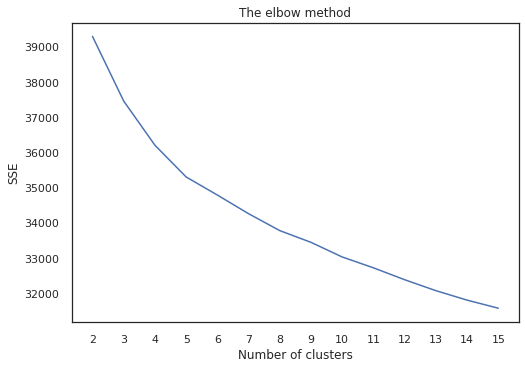

In [ ]:

#  Plot the results onto a line graph:for sse

plt.plot(range(2, max_k), sse);
plt.xticks(range(2,max_k));
plt.title('The elbow method');
plt.xlabel('Number of clusters');
plt.ylabel('SSE'); # Sum of squared errors
plt.show();

##**optimal silhoutte score**

In [ ]:
# display silhoutte score

s_score

[0.06464659833523975,
 0.061687278240968264,
 0.055535062184455315,
 0.0509820581314827,
 0.04323359924452247,
 0.04335002674324989,
 0.04258452403934969,
 0.04210664634995213,
 0.042863958812244835,
 0.040785184033150235,
 0.043711776460393884,
 0.04136491603649432,
 0.04126430648635054,
 0.041893216281766274]

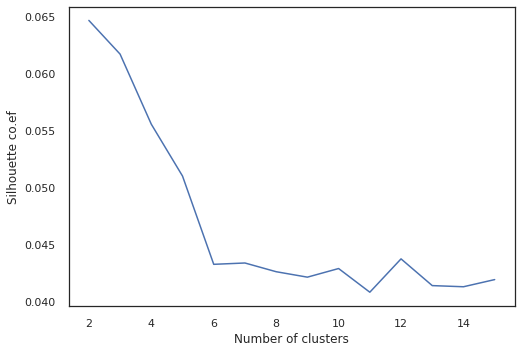

In [ ]:
#Silhouette score plot

plt.plot(range(2,max_k), s_score)
plt.xticks(range(2,max_k,2))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette co.ef")
plt.show();

In [ ]:
#checking number of labels

cluster_labels = kmeans.labels_

In [ ]:
#silhoutte score

sc= silhouette_score(Mpdata_scaled, cluster_labels)
print("The sample_silhouette_values:")

The sample_silhouette_values:


In [ ]:
sc

0.051494675930067874

##**Silhoutte plot**

In [ ]:
#silhoutte plotting

visualizer = SilhouetteVisualizer( model,
                                  colors='yellowbrick')

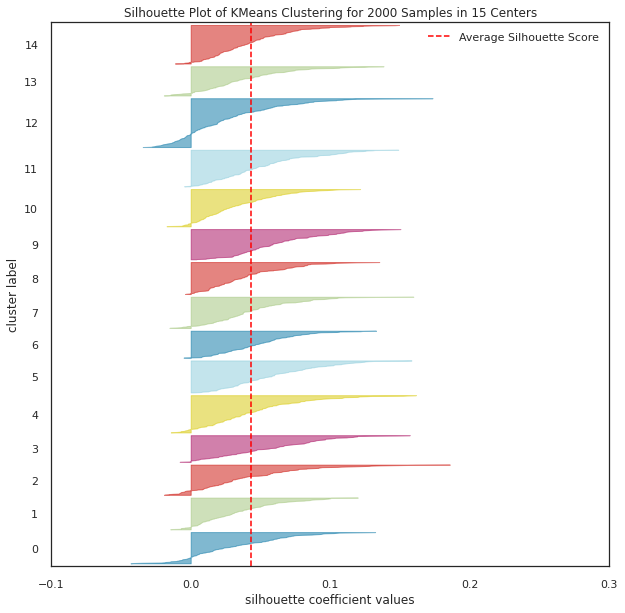

In [ ]:
## 

fig = plt.figure(figsize= (10,10))
_= visualizer.fit(Mpdata_scaled);        # Fit the data to the visualizer
_= visualizer.show()        # Finalize and render the figure



##**CLASSIFICATION AND MODELIND**

In [ ]:
#create a dataframe

X = Mpdata.iloc[:,1:-1].values
Y = Mpdata.iloc[: , -1]

In [ ]:
X

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [ ]:
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [ ]:
# Standardize data:

# Instantiate object
ss = StandardScaler()

# Train object on data
ss.fit(X)

# Trandform data
X = ss.transform(X)

StandardScaler()

In [ ]:
# Split X and y into train and test data:

X_train, X_test, Y_train, Y_test = train_test_split(
                                                     X,
                                                     Y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = Y
                                                    )


In [ ]:
# About train data:
                                   
X_train.shape  
print()

(1400, 20)

In [ ]:
# Test data:

X_test.shape   
print()

(600, 20)

In [ ]:
X_train

array([[ 0.39034429,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.52630497, -0.9900495 ,  0.58562134, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [-1.08242539, -0.9900495 ,  0.21788424, ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.0550255 ,  1.0100505 ,  0.95335845, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [-1.2098985 , -0.9900495 ,  0.70820038, ...,  0.55964063,
        -1.00601811,  0.98609664],
       [ 1.07095964,  1.0100505 , -0.88532709, ...,  0.55964063,
        -1.00601811, -1.01409939]])

In [ ]:
Y_train

1548    2
660     0
365     0
6       3
543     1
       ..
1050    1
290     3
720     3
414     3
1091    2
Name: price_range, Length: 1400, dtype: int64

In [ ]:
X_test

array([[ 0.96169698,  1.0100505 , -0.14985287, ...,  0.55964063,
         0.99401789,  0.98609664],
       [ 0.48139651,  1.0100505 ,  1.4436746 , ..., -1.78686097,
        -1.00601811, -1.01409939],
       [-0.46099398,  1.0100505 ,  1.07593749, ..., -1.78686097,
         0.99401789, -1.01409939],
       ...,
       [ 0.29701576,  1.0100505 ,  0.21788424, ..., -1.78686097,
        -1.00601811, -1.01409939],
       [ 1.66279908, -0.9900495 , -0.88532709, ...,  0.55964063,
         0.99401789, -1.01409939],
       [-0.73642695,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939]])

In [ ]:
Y_test

504     0
254     0
391     1
593     3
1388    3
       ..
343     3
1500    2
1884    3
1715    0
1974    1
Name: price_range, Length: 600, dtype: int64

##**CREATE DECISION TREE**

**DECISION TREE MODELING**
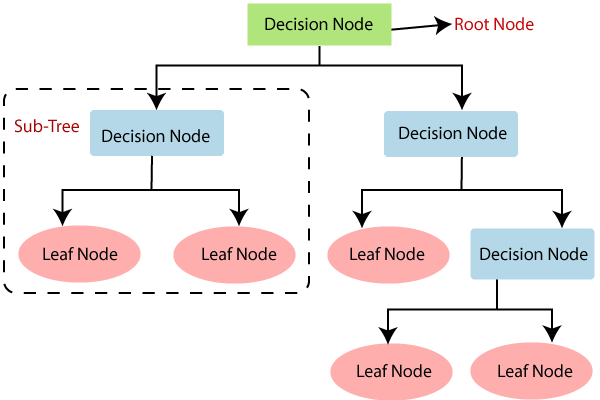

      decision tree classification

In [ ]:
# Start modeling
# Initialize our decision tree object.
#     Supply relevant parameters

dtc = DecisionTreeClassifier(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [ ]:
# Train our decision tree:

dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

###**PREDICTION THE DATA**

In [ ]:
# Make predictions of test data

Y_pred = dtc.predict(X_test)

In [ ]:
Y_pred

array([0, 0, 1, 3, 3, 3, 3, 0, 2, 1, 3, 2, 1, 1, 1, 2, 3, 1, 3, 0, 0, 1,
       1, 2, 0, 0, 0, 1, 2, 0, 0, 3, 1, 2, 0, 3, 1, 3, 3, 0, 1, 0, 2, 2,
       2, 3, 2, 3, 2, 1, 1, 0, 2, 1, 2, 2, 3, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       0, 1, 0, 3, 0, 1, 3, 1, 0, 1, 1, 3, 2, 0, 2, 2, 1, 2, 0, 1, 0, 1,
       0, 2, 2, 1, 2, 3, 2, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 0, 1, 3, 2, 0,
       3, 2, 3, 0, 2, 2, 3, 0, 2, 1, 2, 0, 3, 3, 3, 2, 1, 2, 0, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 2, 2, 1, 0, 3, 0, 1, 2, 2, 0, 1, 2, 1, 3, 3, 2,
       3, 1, 1, 0, 3, 3, 0, 0, 1, 0, 2, 2, 3, 2, 3, 2, 0, 2, 0, 0, 0, 1,
       3, 0, 2, 3, 2, 2, 0, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 3, 0, 0, 3,
       0, 2, 3, 1, 0, 0, 2, 3, 2, 2, 3, 1, 3, 2, 2, 0, 2, 2, 1, 3, 0, 2,
       3, 1, 0, 2, 3, 3, 1, 2, 2, 2, 0, 3, 3, 0, 1, 2, 2, 2, 1, 0, 3, 1,
       1, 2, 1, 2, 0, 0, 1, 2, 3, 3, 2, 1, 0, 1, 2, 3, 1, 1, 1, 1, 2, 0,
       3, 3, 1, 0, 2, 0, 0, 1, 0, 0, 1, 3, 2, 1, 3, 3, 2, 3, 0, 1, 0, 3,
       1, 0, 2, 2, 0, 1, 0, 3, 0, 3, 2, 3, 1, 0, 3,

In [ ]:
Y_test

504     0
254     0
391     1
593     3
1388    3
       ..
343     3
1500    2
1884    3
1715    0
1974    1
Name: price_range, Length: 600, dtype: int64

In [ ]:
# Get accuracy:
from sklearn.metrics import accuracy_score

dt_ac = accuracy_score(Y_test,Y_pred)

In [ ]:
dt_ac

0.835

###**PLOT THE DECISION TREE**

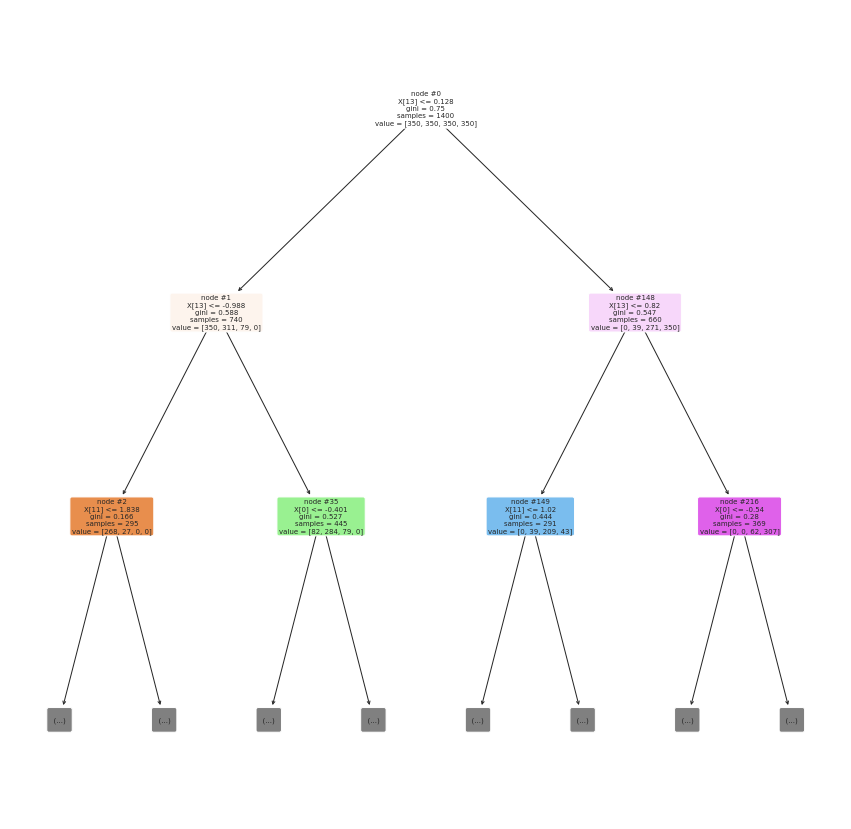

In [ ]:
# Plot decision tree
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree

_=plt.figure(figsize=(15,15))
_=plot_tree(
            dtc,
            max_depth = 2,  # Draw upto depth of 2
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
                        )

_=plt.show()

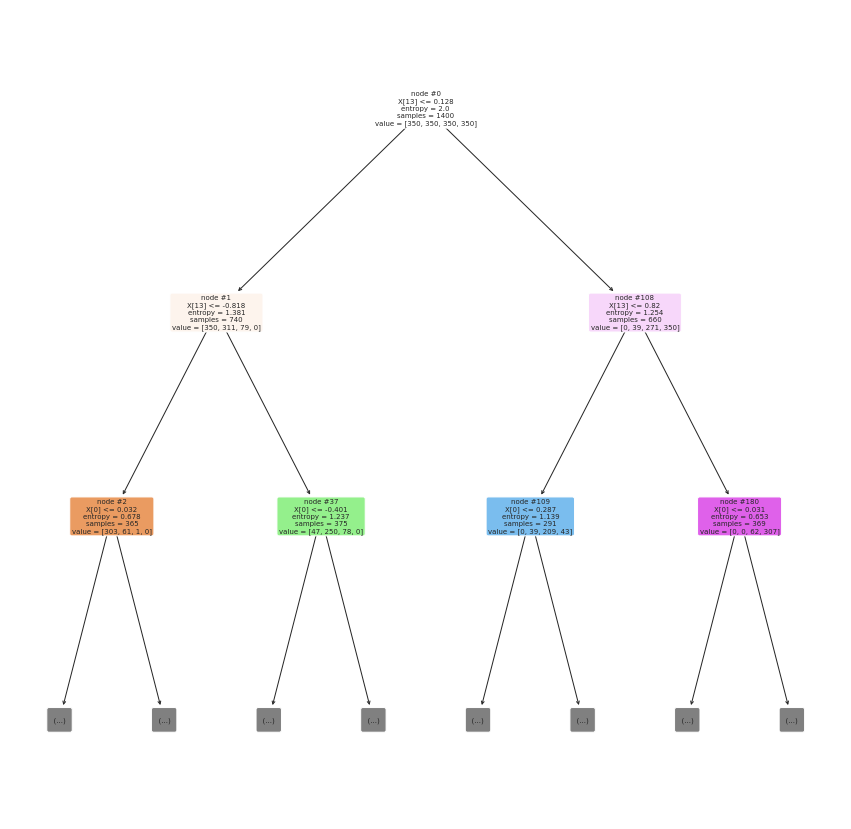

In [ ]:
# Plot decision tree with 'entropy' as criterion:

dtc = DecisionTreeClassifier(
           criterion="entropy",    # Alternative 'entropy'
           max_depth =None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 
_=dtc.fit(X_train,Y_train)

# 
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dtc,
            max_depth = 2,  # Draw upto depth of 2
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
                        )

_=plt.show()

In [ ]:
# Make predictions of test data

y_te = dtc.predict(X_test)
dt_ac=accuracy_score(Y_test,Y_pred)/Y_test.size


In [ ]:
y_te

array([0, 1, 1, 3, 3, 3, 2, 0, 2, 1, 3, 2, 1, 0, 1, 2, 3, 1, 3, 0, 0, 1,
       0, 2, 0, 0, 1, 1, 2, 1, 1, 3, 1, 3, 0, 3, 0, 3, 3, 0, 1, 1, 3, 2,
       2, 3, 2, 3, 2, 1, 1, 0, 1, 0, 3, 2, 3, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       0, 0, 0, 3, 1, 1, 3, 1, 0, 1, 0, 3, 2, 0, 2, 2, 1, 2, 1, 1, 0, 1,
       0, 1, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 0, 1, 2, 2, 0,
       3, 2, 3, 0, 3, 2, 2, 0, 2, 1, 2, 0, 3, 2, 3, 2, 1, 2, 0, 3, 3, 3,
       2, 1, 1, 3, 1, 0, 2, 2, 1, 0, 3, 0, 1, 2, 2, 0, 1, 2, 1, 3, 3, 2,
       3, 1, 1, 0, 2, 2, 0, 0, 1, 0, 3, 2, 3, 2, 3, 2, 0, 2, 0, 0, 0, 1,
       3, 0, 2, 3, 3, 2, 0, 3, 1, 1, 3, 3, 1, 1, 1, 1, 2, 2, 3, 0, 0, 3,
       0, 2, 3, 2, 0, 0, 2, 3, 2, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3, 0, 2,
       3, 1, 0, 3, 3, 3, 0, 2, 2, 2, 0, 3, 3, 0, 1, 3, 2, 2, 1, 0, 3, 1,
       1, 1, 0, 2, 0, 0, 1, 2, 3, 3, 3, 2, 0, 2, 1, 3, 1, 0, 1, 0, 2, 0,
       2, 3, 1, 0, 2, 0, 0, 1, 0, 0, 1, 3, 2, 1, 3, 3, 3, 3, 0, 1, 0, 3,
       1, 1, 3, 1, 0, 0, 0, 3, 0, 3, 3, 3, 1, 0, 3,